In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

In [2]:
name = "FASERnu-muminus-1cm2-test.root"
print(name)
g = uproot.open(name)
xarray = g["ntuple"]["x"].array()
print("x")
yarray = g["ntuple"]["y"].array()
print("y")
zarray = g["ntuple"]["z"].array()
print("z")
pxarray = g["ntuple"]["px"].array()
print("px")
pyarray = g["ntuple"]["py"].array()
print("py")
pzarray = g["ntuple"]["pz"].array()
print("pz")
izarray = g["ntuple"]["iz"].array()
print("iz")
truthclusterarray = g["ntuple"]["truthcluster"].array()
print("truthcluster")
pdgidarray = g["ntuple"]["pdgid"].array()
print("pdgid")
rawarray = np.array([xarray,yarray,zarray,pxarray,pyarray,pzarray,izarray,truthclusterarray,pdgidarray]).T
print(rawarray.shape[0])

FASERnu-muminus-1cm2-test.root
x
y
z
px
py
pz
iz
truthcluster
pdgid
30672305


In [3]:
def getExtrapArray(clsarray):
    x = clsarray[:,0]
    y = clsarray[:,1]
    z = clsarray[:,2]
    px = clsarray[:,3]
    py = clsarray[:,4]
    pz = clsarray[:,5]
    iz = clsarray[:,6]
    xextrap = np.array([x-1.3*iz*px/pz]).T
    yextrap = np.array([y-1.3*iz*py/pz]).T
    return np.hstack((xextrap,yextrap))

In [4]:
muonbkgarray = rawarray[rawarray[:,8]!=13] # remove muons
eplusarray = rawarray[rawarray[:,8]==-11]
eminusarray = rawarray[rawarray[:,8]==11]
gammaarray = rawarray[rawarray[:,8]==22]

In [8]:
eminusenergyarray = np.sqrt(eminusarray[:,3]**2+eminusarray[:,4]**2+eminusarray[:,5]**2) # Truth energy of e-
eminusfullarray = np.hstack((eminusarray,np.array([eminusenergyarray]).T)) # e- array with truth energy
eminuscutarray = eminusfullarray[eminusfullarray[:,9]>100000] # cut truth energy
muminusarray = rawarray[rawarray[:,8]==13] # Get only muon hits
muminusenergyarray = np.sqrt(muminusarray[:,3]**2+muminusarray[:,4]**2+muminusarray[:,5]**2) # Truth energy of e-
muminusfullarray = np.hstack((muminusarray,np.array([muminusenergyarray]).T)) # e- array with truth energy
evtidxarray = np.unique(eminuscutarray[:,7]) # Get evt idx of events with high-E electrons
evtidxarray.shape[0]

48

idx 0
electron_z = -60.45
p_e = [   426.56958    248.4676  226938.61   ]
p_mu = [  1723.2611   1148.8547 951122.2   ]
p_mu0 = [   2292.4133    1505.7032 1260960.1   ]
muon energy loss = 309838.7
opening angle= 0.0
idx 1
electron_z = -3.25
p_e = [ -1377.1357  -1159.546  628268.3   ]
p_mu = [  -268.3699    -207.17223 164915.28   ]
p_mu0 = [  -2203.1904   -1815.6201 1054823.    ]
muon energy loss = 889911.25
opening angle= 0.00077204045
idx 2
electron_z = 3.25
p_e = [ 12771.576    -957.2387 922662.7   ]
p_mu = [  8444.742     -675.65247 607485.2    ]
p_mu0 = [  29224.639   -2181.751 2108405.8  ]
muon energy loss = 1501065.2
opening angle= 0.0
idx 3
electron_z = -79.95
p_e = [-7.2244269e+02  7.7051582e+01  2.3332527e+05]
p_mu = [-1.6805615e+03 -4.6855832e+02  5.4894669e+05]
p_mu0 = [-2.5378013e+03 -3.8288608e+02  8.3430044e+05]
muon energy loss = 285354.94
opening angle= 0.00119604
idx 4
electron_z = 12.35
p_e = [4.3479500e+01 3.2104135e+02 1.7020106e+05]
p_mu = [2.6851474e+02 1.1389554e+0

electron_z = -61.75
p_e = [   335.16324   -606.65125 314721.2    ]
p_mu = [ 7.0218018e+02 -1.6284204e+03  7.9853525e+05]
p_mu0 = [   2447.1072   -4740.4727 2429976.    ]
muon energy loss = 1631444.5
opening angle= 0.0
idx 38
electron_z = -82.55
p_e = [ 1.1281448e+02 -8.6392358e+02  2.3099834e+05]
p_mu = [ 2.1536098e+02 -1.6484167e+03  4.4419100e+05]
p_mu0 = [ 7.1589771e+02 -5.3160640e+03  1.4417475e+06]
muon energy loss = 997563.4
opening angle= 0.0
idx 39
electron_z = -83.85
p_e = [  -403.37994   -170.0636  128630.484  ]
p_mu = [ -165.43103  -164.62222 45714.566  ]
p_mu0 = [  -696.4131   -385.1538 211318.61  ]
muon energy loss = 165604.94
opening angle= 0.0023670318
idx 40
electron_z = -77.35
p_e = [ 7.6420081e+02 -3.2840088e+01  1.3086549e+05]
p_mu = [ 3.4290791e+03 -2.2990457e+02  5.7006812e+05]
p_mu0 = [ 5.8714541e+03 -3.1288364e+02  9.8967775e+05]
muon energy loss = 419616.8
opening angle= 0.0
idx 41
electron_z = -42.25
p_e = [ -1820.484     -345.75085 282438.06   ]
p_mu = [ -3261

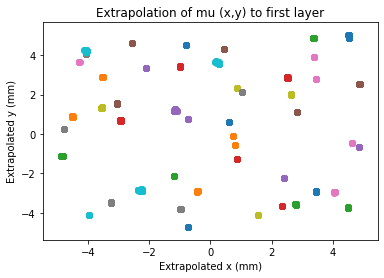

In [9]:
thetaarray100 = np.array([])
elossarray100 = np.array([])
for idx in range(0,evtidxarray.shape[0]): # Change this to view different electrons
    print("idx",idx)
    muminusevtarray = muminusfullarray[muminusfullarray[:,7]==evtidxarray[idx]] # Get the muon hits for the event with high-E electron
    extrapscatterarray = getExtrapArray(muminusevtarray) # Get extrapolated x,y
    eminusevtarray = eminuscutarray[eminuscutarray[:,7]==evtidxarray[idx]]
    electronrow = eminusevtarray[eminusevtarray[:,9]==np.amax(eminusevtarray)]
    electroniz = electronrow[:,6]
    muonrow = muminusevtarray[muminusevtarray[:,6]==electroniz]
    muoninitrow = muminusevtarray[muminusevtarray[:,6]==0]
    electronpvec = electronrow[0,3:6]
    print("electron_z =",electronrow[0,2])
    print("p_e =",electronpvec)
    pe = np.linalg.norm(electronpvec)
    muonpvec = muonrow[0,3:6]
    print("p_mu =",muonpvec)
    muoninitpvec = muoninitrow[0,3:6]
    print("p_mu0 =",muoninitpvec)

    pmu = np.linalg.norm(muonpvec)
    pmu0 = np.linalg.norm(muoninitpvec)
    eloss = pmu0-pmu
    print("muon energy loss =",eloss)
    pedotpmu = np.dot(electronpvec,muonpvec)
    if pedotpmu>pe*pmu:
        pedotpmu=pe*pmu
    thetaop = np.arccos(pedotpmu/(pe*pmu))
    print("opening angle=",thetaop)
    thetaarray100 = np.append(thetaarray100,thetaop)
    elossarray100 = np.append(elossarray100,eloss)
    plt.title("Extrapolation of mu (x,y) to first layer")
    plt.xlabel("Extrapolated x (mm)")
    plt.ylabel("Extrapolated y (mm)")
    plt.scatter(extrapscatterarray[:,0],extrapscatterarray[:,1])

idx 0
electron_z = -78.65
p_e = [  -35.70517   -86.29096 15508.664  ]
p_mu = [  -2655.4146   -6686.297  1167177.6   ]
p_mu0 = [  -2683.2466   -6765.3433 1184621.    ]
muon energy loss = 17443.5
opening angle= 0.00048828125
idx 1
electron_z = -13.65
p_e = [  -51.64634   -29.42507 18371.926  ]
p_mu = [ -145.75154  -179.95323 62998.96   ]
p_mu0 = [ -169.13258  -254.75368 83471.484  ]
muon energy loss = 20472.66
opening angle= 0.0013372133
idx 2
electron_z = -29.25
p_e = [  -36.384846  -160.57309  32934.58    ]
p_mu = [ -1239.4452  -4457.2334 949109.4   ]
p_mu0 = [ -1359.4127  -4666.433  992245.25  ]
muon energy loss = 43136.438
opening angle= 0.00048828125
idx 3
electron_z = -60.45
p_e = [   426.56958    248.4676  226938.61   ]
p_mu = [  1723.2611   1148.8547 951122.2   ]
p_mu0 = [   2292.4133    1505.7032 1260960.1   ]
muon energy loss = 309838.7
opening angle= 0.0
idx 4
electron_z = 9.75
p_e = [-8.2733035e-01  7.8568190e-01  1.0138559e+04]
p_mu = [-8.5347816e+01 -5.2184265e+01  1.383305

electron_z = -79.95
p_e = [-7.2244269e+02  7.7051582e+01  2.3332527e+05]
p_mu = [-1.6805615e+03 -4.6855832e+02  5.4894669e+05]
p_mu0 = [-2.5378013e+03 -3.8288608e+02  8.3430044e+05]
muon energy loss = 285354.94
opening angle= 0.00119604
idx 38
electron_z = -100.75
p_e = [ -331.95758  -100.63108 27901.17   ]
p_mu = [ -17068.848   -5064.169 1442425.9  ]
p_mu0 = [ -17399.771    -5139.7236 1471124.9   ]
muon energy loss = 28701.0
opening angle= 0.0
idx 39
electron_z = 12.35
p_e = [  -16.042885    30.946386 11793.867   ]
p_mu = [  -2643.8257    5214.421  2097985.8   ]
p_mu0 = [  -2596.939    5202.725 2118850.   ]
muon energy loss = 20864.25
opening angle= 0.0
idx 40
electron_z = -18.85
p_e = [  -42.87854  -114.93681 26125.797  ]
p_mu = [  -2182.625   -5875.614 1353347.1  ]
p_mu0 = [  -2241.2126   -6048.269  1403995.2   ]
muon energy loss = 50648.375
opening angle= 0.0
idx 41
electron_z = -51.35
p_e = [-3.59701118e+01  1.10550095e+02  4.76598906e+04]
p_mu = [-9.5427112e+02  2.5311082e+03  1.

electron_z = 8.45
p_e = [   19.331886    38.85962  10451.041   ]
p_mu = [   2171.84      5135.7676 1348617.2   ]
p_mu0 = [   2297.0256    5145.9087 1366264.6   ]
muon energy loss = 17647.5
opening angle= 0.0
idx 75
electron_z = -100.75
p_e = [ -195.05853  -137.83559 34097.91   ]
p_mu = [ -12532.891   -8801.474 2210502.5  ]
p_mu0 = [ -12920.24    -9078.291 2282113.   ]
muon energy loss = 71612.0
opening angle= 0.0
idx 76
electron_z = -79.95
p_e = [5.4017372e+00 4.4159538e+01 1.9055588e+04]
p_mu = [7.3473320e+01 5.8922372e+00 1.7483635e+04]
p_mu0 = [4.2811939e+01 7.2184875e+01 4.8297898e+04]
muon energy loss = 30814.184
opening angle= 0.0043809502
idx 77
electron_z = 4.55
p_e = [  222.6533    102.19734 17009.564  ]
p_mu = [  13453.884    6043.828 1015599.75 ]
p_mu0 = [  13786.383     6123.3447 1042377.94  ]
muon energy loss = 26780.25
opening angle= 0.0
idx 78
electron_z = -109.85
p_e = [   36.500587    90.18706  16828.37    ]
p_mu = [   3148.81     7702.436 1433227.   ]
p_mu0 = [   3184

electron_z = -73.45
p_e = [ -108.37571   297.8114  82532.64   ]
p_mu = [  -1631.8922    4459.593  1244823.5   ]
p_mu0 = [  -1819.5453    5108.9995 1412766.2   ]
muon energy loss = 167944.12
opening angle= 0.0
idx 112
electron_z = 16.25
p_e = [ 9.5005503e+00 -3.6943279e+01  1.4072301e+04]
p_mu = [ 9.2222528e+02 -2.4695803e+03  1.0197276e+06]
p_mu0 = [ 1.0032315e+03 -2.5268506e+03  1.0443611e+06]
muon energy loss = 24633.625
opening angle= 0.00034526698
idx 113
electron_z = -60.45
p_e = [-5.1226166e+01  1.2132773e+01  2.1244744e+04]
p_mu = [-3.5788144e+02  1.3919983e+02  1.7094572e+05]
p_mu0 = [-4.3128174e+02  1.8432076e+02  2.0542070e+05]
muon energy loss = 34475.08
opening angle= 0.00048828125
idx 114
electron_z = -11.05
p_e = [  -25.335653   -44.703968 14623.117   ]
p_mu = [ -1576.0443  -2599.3022 882631.3   ]
p_mu0 = [ -1482.2041  -2648.248  904908.9   ]
muon energy loss = 22277.438
opening angle= 0.00034526698
idx 115
electron_z = -64.35
p_e = [  -55.07609   -44.30055 17295.611  ]
p

electron_z = -29.25
p_e = [  -75.46484    -18.739407 12521.02    ]
p_mu = [ -5465.068   -1613.9657 904471.3   ]
p_mu0 = [ -5627.274   -1652.8633 931769.9   ]
muon energy loss = 27299.062
opening angle= 0.00048828125
idx 148
electron_z = -94.25
p_e = [  -79.93161   -87.63396 21795.463  ]
p_mu = [-1.5327718e+02  1.6855067e+03  8.6209169e+05]
p_mu0 = [-2.5355354e+02  1.5813766e+03  8.8391869e+05]
muon energy loss = 21826.75
opening angle= 0.006922595
idx 149
electron_z = -47.45
p_e = [-6.9969678e+00 -1.9393541e+02  2.6428242e+04]
p_mu = [-6.0617627e+02 -9.1294697e+03  1.2566586e+06]
p_mu0 = [-6.7294745e+02 -9.3345947e+03  1.2913639e+06]
muon energy loss = 34705.875
opening angle= 0.0
idx 150
electron_z = -20.15
p_e = [  -63.963886   -70.96741  25826.44    ]
p_mu = [  -3389.3733   -3821.6255 1360405.5   ]
p_mu0 = [  -3365.5432   -3961.4126 1390582.2   ]
muon energy loss = 30176.875
opening angle= 0.0
idx 151
electron_z = -50.05
p_e = [ 3.7051933e+01 -5.5240753e+01  4.1288609e+04]
p_mu = [ 

p_mu0 = [ -13222.279     4690.6094 2223349.    ]
muon energy loss = 21269.25
opening angle= 0.000845728
idx 184
electron_z = -56.55
p_e = [   54.424038    65.52647  11424.499   ]
p_mu = [   7191.9478    8585.5625 1510866.5   ]
p_mu0 = [   7260.9023    8620.921  1529168.8   ]
muon energy loss = 18302.125
opening angle= 0.00048828125
idx 185
electron_z = -24.05
p_e = [ -2027.0752  -2980.1975 543997.44  ]
p_mu = [ -1983.145  -2459.023 497005.   ]
p_mu0 = [  -4104.035   -5577.994 1064100.5  ]
muon energy loss = 567108.0
opening angle= 0.00059802
idx 186
electron_z = -104.65
p_e = [   66.86603    -78.209175 17950.852   ]
p_mu = [   4366.8096   -5307.774  1202236.2   ]
p_mu0 = [   4450.2007   -5442.047  1226798.4   ]
muon energy loss = 24562.625
opening angle= 0.0
idx 187
electron_z = -94.25
p_e = [ -341.96307    43.46952 14040.465  ]
p_mu = [ -29087.89     -3376.3855 2991772.8   ]
p_mu0 = [ -29836.818    -3474.6853 3070590.2   ]
muon energy loss = 78821.0
opening angle= 0.0152310785
idx 188

electron_z = -48.75
p_e = [  170.99666    -46.208042 12422.239   ]
p_mu = [  18983.986   -5733.748 1387277.   ]
p_mu0 = [  19191.426   -5742.11  1399876.1  ]
muon energy loss = 12600.75
opening angle= 0.00048828125
idx 221
electron_z = -48.75
p_e = [  -67.28226    -15.651536 11951.131   ]
p_mu = [-8.0072959e+03 -1.0983777e+03  1.4455290e+06]
p_mu0 = [-8.1392471e+03 -1.1170468e+03  1.4658809e+06]
muon energy loss = 20352.25
opening angle= 0.000845728
idx 222
electron_z = -3.25
p_e = [  -29.597952   -44.118652 13740.224   ]
p_mu = [  -4207.11    -4885.312 1815840.9  ]
p_mu0 = [  -4224.576   -4747.111 1842132.4  ]
muon energy loss = 26291.0
opening angle= 0.00059802
idx 223
electron_z = -29.25
p_e = [ 7.0000916e+01 -1.5339663e+01  1.9430715e+04]
p_mu = [ 7.5840010e+03 -1.7513788e+03  1.9273578e+06]
p_mu0 = [ 7.6960088e+03 -1.7847260e+03  1.9589632e+06]
muon energy loss = 31605.625
opening angle= 0.00048828125
idx 224
electron_z = -64.35
p_e = [  -28.743387   -37.92783  22121.518   ]
p_mu 

idx 257
electron_z = -87.75
p_e = [1.0971019e+01 8.4952904e+01 2.7309176e+04]
p_mu = [5.8421527e+02 5.0327427e+03 1.7854632e+06]
p_mu0 = [5.7882251e+02 5.1237168e+03 1.8217315e+06]
muon energy loss = 36268.375
opening angle= 0.0
idx 258
electron_z = -39.65
p_e = [-9.4977369e+00 -2.0022081e+01  2.2755904e+04]
p_mu = [-9.0358124e+02 -1.7029822e+03  1.5108582e+06]
p_mu0 = [-9.8182727e+02 -1.7816910e+03  1.5514808e+06]
muon energy loss = 40622.75
opening angle= 0.0
idx 259
electron_z = -4.55
p_e = [-1.9428035e+03  4.3217063e+00  6.0381288e+05]
p_mu = [  -839.75116   -614.9107  269432.3    ]
p_mu0 = [-2.8978557e+03 -6.3201855e+02  8.8282244e+05]
muon energy loss = 613393.1
opening angle= 0.0022902426
idx 260
electron_z = -30.55
p_e = [ 9.9680969e+01 -1.5331434e+01  2.5652283e+04]
p_mu = [  138.77158  -189.65993 32432.037  ]
p_mu0 = [  322.9454   -221.34784 96348.695  ]
muon energy loss = 63916.6
opening angle= 0.005258956
idx 261
electron_z = -69.55
p_e = [  -63.143585    70.02607  57740.75

electron_z = -57.85
p_e = [-2.3729069e+00  4.7840199e+01  1.0121171e+04]
p_mu = [-5.27074890e+02  5.37493164e+03  1.02083725e+06]
p_mu0 = [-5.5853351e+02  5.3908013e+03  1.0359237e+06]
muon energy loss = 15086.3125
opening angle= 0.00077204045
idx 294
electron_z = -7.15
p_e = [-1.9936464e+02  4.8570374e+01  9.9106758e+04]
p_mu = [-2.7749597e+03  7.5924725e+02  1.2697332e+06]
p_mu0 = [-3.0185271e+03  9.0719214e+02  1.3820511e+06]
muon energy loss = 112318.25
opening angle= 0.0
idx 295
electron_z = -43.55
p_e = [-2.2052868e+01  9.1030083e+00  1.5151513e+04]
p_mu = [  -4128.684     2100.7627 1778699.    ]
p_mu0 = [  -4347.294    2137.132 1824423.4  ]
muon energy loss = 45724.875
opening angle= 0.001035801
idx 296
electron_z = -37.05
p_e = [   48.591053   -75.72839  13150.842   ]
p_mu = [   4445.7603   -7147.912  1220462.1   ]
p_mu0 = [   4765.623    -7591.0513 1299758.9   ]
muon energy loss = 79298.625
opening angle= 0.0
idx 297
electron_z = 1.95
p_e = [-1.1418976e+01  1.6145533e+01  1.42

muon energy loss = 293425.75
opening angle= 0.0
idx 330
electron_z = 4.55
p_e = [  -26.133183    28.940102 10227.022   ]
p_mu = [  -1451.5859    2615.9424 1054608.4   ]
p_mu0 = [  -1482.9838    2626.502  1066683.8   ]
muon energy loss = 12075.375
opening angle= 0.0012448779
idx 331
electron_z = 11.05
p_e = [ 1.10287266e+01 -1.21979675e+02  1.97418438e+04]
p_mu = [ 2.2171091e+03 -1.4401355e+04  2.4432395e+06]
p_mu0 = [ 2.1223042e+03 -1.4579022e+04  2.4703728e+06]
muon energy loss = 27133.75
opening angle= 0.0
idx 332
electron_z = -74.75
p_e = [  -38.11576  -154.94534 28894.996  ]
p_mu = [  -758.7378  -2903.7773 554498.06  ]
p_mu0 = [  -837.7931  -3049.742  587192.6   ]
muon energy loss = 32694.938
opening angle= 0.0
idx 333
electron_z = -77.35
p_e = [   24.46602    -28.890171 15573.636   ]
p_mu = [   1639.8636   -2414.596  1485557.1   ]
p_mu0 = [   1731.9863   -2477.8738 1525927.4   ]
muon energy loss = 40370.375
opening angle= 0.00034526698
idx 334
electron_z = -25.35
p_e = [  -86.4921

electron_z = -89.05
p_e = [  -42.276596    39.499382 14982.099   ]
p_mu = [  -3538.5896    3662.7856 1125252.8   ]
p_mu0 = [  -3755.6582    3887.2546 1188130.1   ]
muon energy loss = 62878.125
opening angle= 0.00069053395
idx 367
electron_z = -86.45
p_e = [ 1.9842142e+01 -1.9453574e+02  2.7522922e+04]
p_mu = [   1830.912   -8977.452 1214424.1  ]
p_mu0 = [   1871.6611   -9240.642  1249646.    ]
muon energy loss = 35222.875
opening angle= 0.00077204045
idx 368
electron_z = -42.25
p_e = [   60.287045    30.480852 13495.771   ]
p_mu = [   5574.0874    2200.4104 1444364.1   ]
p_mu0 = [   5650.4116    2208.9055 1460839.9   ]
muon energy loss = 16476.0
opening angle= 0.00077204045
idx 369
electron_z = -47.45
p_e = [   33.385998   -18.270391 12893.708   ]
p_mu = [ 4.4613462e+03 -1.8168926e+03  1.8547976e+06]
p_mu0 = [ 4.5392544e+03 -1.8680463e+03  1.8686041e+06]
muon energy loss = 13806.625
opening angle= 0.00059802
idx 370
electron_z = -52.65
p_e = [-7.3198051e+00 -2.7973347e+01  1.5683687e+0

idx 403
electron_z = -100.75
p_e = [ -128.20139    23.29799 16213.216  ]
p_mu = [  -8787.682     1490.8369 1206685.4   ]
p_mu0 = [  -9035.678     1520.4315 1244069.1   ]
muon energy loss = 37384.625
opening angle= 0.00048828125
idx 404
electron_z = 14.95
p_e = [-1.9396687e+01 -8.3814690e+01  2.2979717e+04]
p_mu = [-5.7485321e+02 -2.8304951e+03  7.1900994e+05]
p_mu0 = [-5.6291821e+02 -2.9385645e+03  7.4385725e+05]
muon energy loss = 24847.5
opening angle= 0.0
idx 405
electron_z = -21.45
p_e = [5.9074237e+02 4.5376667e+01 6.2781461e+04]
p_mu = [2.2334816e+04 1.3488359e+03 2.3893278e+06]
p_mu0 = [2.3066301e+04 1.5177972e+03 2.4689715e+06]
muon energy loss = 79647.25
opening angle= 0.00048828125
idx 406
electron_z = 13.65
p_e = [  -16.843885   -11.188313 10357.611   ]
p_mu = [-2.1480320e+03 -5.8015881e+02  1.2072838e+06]
p_mu0 = [-2.2799907e+03 -6.6513910e+02  1.2286295e+06]
muon energy loss = 21346.0
opening angle= 0.00034526698
idx 407
electron_z = -77.35
p_e = [2.06919422e+01 1.08343704

electron_z = 3.25
p_e = [ 2.1041231e+00 -1.0320214e+01  1.0393182e+04]
p_mu = [-2.6452266e+03 -4.9489971e+03  2.8615928e+06]
p_mu0 = [-2.7758291e+03 -4.8724683e+03  2.8723855e+06]
muon energy loss = 10792.75
opening angle= 0.0012918708
idx 440
electron_z = -59.15
p_e = [-3.7469124e+01  8.6035166e+00  1.8720859e+04]
p_mu = [-3.2866025e+03  9.0503333e+02  1.3530635e+06]
p_mu0 = [-3.3616116e+03  9.3807562e+02  1.3817022e+06]
muon energy loss = 28638.875
opening angle= 0.0
idx 441
electron_z = -42.25
p_e = [   30.441769  -179.97723  26287.152   ]
p_mu = [   2143.5325  -11598.676  1696835.4   ]
p_mu0 = [   2261.8574  -11848.625  1739170.9   ]
muon energy loss = 42336.25
opening angle= 0.0
idx 442
electron_z = -100.75
p_e = [-2.6067514e+00 -1.9309441e+02  7.3630461e+04]
p_mu = [-1.1574176e+02 -2.6498364e+03  9.4762212e+05]
p_mu0 = [-1.3635275e+02 -2.8287373e+03  1.0220966e+06]
muon energy loss = 74474.75
opening angle= 0.0
idx 443
electron_z = -13.65
p_e = [ -512.75055  -327.02722 96458.38  

electron_z = 16.25
p_e = [   56.080093    17.223988 12578.964   ]
p_mu = [   7664.5757    1959.8566 1578975.9   ]
p_mu0 = [   7817.5537    2010.1056 1619490.6   ]
muon energy loss = 40515.0
opening angle= 0.00048828125
idx 476
electron_z = 16.25
p_e = [-3.4723064e+01 -5.4422174e+00  1.3132145e+04]
p_mu = [ -2620.5078  -1042.532  885836.7   ]
p_mu0 = [  -3243.1191   -1362.9415 1093453.    ]
muon energy loss = 207617.44
opening angle= 0.0009134906
idx 477
electron_z = 9.75
p_e = [  200.09938   102.35939 46756.062  ]
p_mu = [   768.3318     242.67244 174310.92   ]
p_mu0 = [  1135.4254     360.34302 237407.14   ]
muon energy loss = 63097.344
opening angle= 0.00069053395
idx 478
electron_z = -61.75
p_e = [   335.16324   -606.65125 314721.2    ]
p_mu = [ 7.0218018e+02 -1.6284204e+03  7.9853525e+05]
p_mu0 = [   2447.1072   -4740.4727 2429976.    ]
muon energy loss = 1631444.5
opening angle= 0.0
idx 479
electron_z = -31.85
p_e = [ 1.6782349e+02 -2.5674482e+01  2.7990887e+04]
p_mu = [ 9.7682754

electron_z = -95.55
p_e = [ 1.2305131e+01 -3.8881347e+00  1.6729824e+04]
p_mu = [ 7.2768915e+02 -6.4720972e+02  1.3923932e+06]
p_mu0 = [ 6.9834821e+02 -6.7949664e+02  1.4100018e+06]
muon energy loss = 17608.5
opening angle= 0.0
idx 513
electron_z = -3.25
p_e = [  -79.30013  -133.93756 78193.11   ]
p_mu = [-1.3582772e+03 -2.5688911e+03  1.4273535e+06]
p_mu0 = [-1.4556758e+03 -2.6888569e+03  1.5263105e+06]
muon energy loss = 98957.125
opening angle= 0.00034526698
idx 514
electron_z = -5.85
p_e = [  -14.997065   173.42613  14688.68    ]
p_mu = [  -2051.992   24158.816 2040520.6  ]
p_mu0 = [  -2124.5073   24354.53   2056498.8   ]
muon energy loss = 15979.25
opening angle= 0.0
idx 515
electron_z = -77.35
p_e = [  -31.118378   -23.045542 22789.555   ]
p_mu = [-1.5440411e+03 -1.1033809e+03  1.1264218e+06]
p_mu0 = [-1.6324236e+03 -1.0951068e+03  1.1583810e+06]
muon energy loss = 31959.25
opening angle= 0.0
idx 516
electron_z = -42.25
p_e = [   81.94781    -34.996014 14836.63    ]
p_mu = [  416

electron_z = -3.25
p_e = [ 1.5483351e-01 -1.8901270e+01  1.0412668e+04]
p_mu = [  -937.36816  -1335.9536  786020.5    ]
p_mu0 = [  -979.8925  -1358.6246 817915.6   ]
muon energy loss = 31895.125
opening angle= 0.0013372133
idx 549
electron_z = -11.05
p_e = [-1.1957893e+01 -1.0929608e+01  2.5218176e+04]
p_mu = [4.712816e+01 5.597362e+01 2.144792e+05]
p_mu0 = [-7.7175209e+01 -1.0261102e+02  3.7143934e+05]
muon energy loss = 156960.16
opening angle= 0.0009765625
idx 550
electron_z = -5.85
p_e = [-8.3850037e+01 -9.7824125e+00  5.0058242e+04]
p_mu = [-4.2697031e+03 -4.2933817e+02  2.4717232e+06]
p_mu0 = [-4.3851113e+03 -5.0334235e+02  2.5613792e+06]
muon energy loss = 89656.0
opening angle= 0.0
idx 551
electron_z = -48.75
p_e = [-1.6578469e+00  8.5544846e+01  2.4313076e+04]
p_mu = [-9.5826973e+01  3.6181565e+03  1.0267495e+06]
p_mu0 = [-1.5086014e+02  3.7950964e+03  1.0802108e+06]
muon energy loss = 53461.5
opening angle= 0.0
idx 552
electron_z = -50.05
p_e = [   44.71092    -36.886658 1198

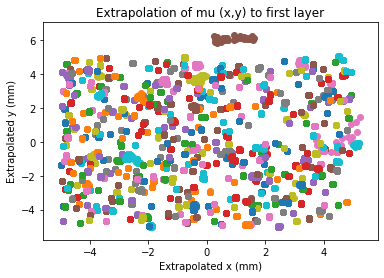

In [7]:
thetaarray = np.array([])
elossarray = np.array([])
for idx in range(0,evtidxarray.shape[0]): # Change this to view different electrons
    print("idx",idx)
    muminusevtarray = muminusfullarray[muminusfullarray[:,7]==evtidxarray[idx]] # Get the muon hits for the event with high-E electron
    extrapscatterarray = getExtrapArray(muminusevtarray) # Get extrapolated x,y
    eminusevtarray = eminuscutarray[eminuscutarray[:,7]==evtidxarray[idx]]
    electronrow = eminusevtarray[eminusevtarray[:,9]==np.amax(eminusevtarray)]
    electroniz = electronrow[:,6]
    muonrow = muminusevtarray[muminusevtarray[:,6]==electroniz]
    muoninitrow = muminusevtarray[muminusevtarray[:,6]==0]
    electronpvec = electronrow[0,3:6]
    print("electron_z =",electronrow[0,2])
    print("p_e =",electronpvec)
    pe = np.linalg.norm(electronpvec)
    muonpvec = muonrow[0,3:6]
    print("p_mu =",muonpvec)
    muoninitpvec = muoninitrow[0,3:6]
    print("p_mu0 =",muoninitpvec)

    pmu = np.linalg.norm(muonpvec)
    pmu0 = np.linalg.norm(muoninitpvec)
    eloss = pmu0-pmu
    print("muon energy loss =",eloss)
    pedotpmu = np.dot(electronpvec,muonpvec)
    if pedotpmu>pe*pmu:
        pedotpmu=pe*pmu
    thetaop = np.arccos(pedotpmu/(pe*pmu))
    print("opening angle=",thetaop)
    thetaarray = np.append(thetaarray,thetaop)
    elossarray = np.append(elossarray,eloss)
    plt.title("Extrapolation of mu (x,y) to first layer")
    plt.xlabel("Extrapolated x (mm)")
    plt.ylabel("Extrapolated y (mm)")
    plt.scatter(extrapscatterarray[:,0],extrapscatterarray[:,1])

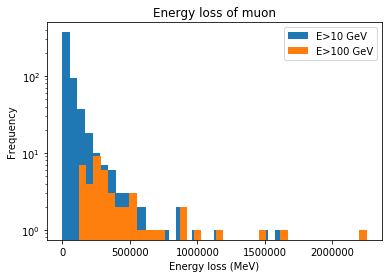

In [15]:
plt.title("Energy loss of muon")
plt.xlabel("Energy loss (MeV)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.hist(elossarray,bins=40,label="E>10 GeV")
plt.hist(elossarray100,bins=40,label="E>100 GeV")
plt.legend()

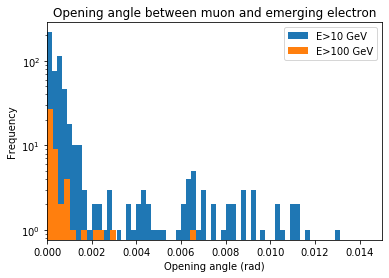

In [26]:
plt.title("Opening angle between muon and emerging electron")
plt.xlabel("Opening angle (rad)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.xlim(0,0.015)
plt.hist(thetaarray,bins=100,label = "E>10 GeV")
plt.hist(thetaarray100,bins=26,label = "E>100 GeV")
plt.legend()

In [103]:
bkgarray = rawarray[rawarray[:,8]!=13] # Get non-muon hits
bkgenergyarray = np.sqrt(bkgarray[:,3]**2+bkgarray[:,4]**2+bkgarray[:,5]**2) # Truth energy of e-
bkgfullarray = np.hstack((bkgarray,np.array([bkgenergyarray]).T)) # e- array with truth energy
bkgevtarray = bkgfullarray[bkgfullarray[:,7]==evtidxarray[idx]] # Get the muon hits for the event with high-E electron
bkgevtarray

array([[-6.0824150e-01, -3.0621958e+00,  5.8499999e+00, ...,
        -9.7284000e+04,  1.1000000e+01,  2.8464411e+01],
       [-5.8070952e-01, -3.1301444e+00,  7.1500001e+00, ...,
        -9.7284000e+04,  1.1000000e+01,  2.5150457e+01],
       [-4.0345028e-01, -3.4364493e+00,  8.4499998e+00, ...,
        -9.7284000e+04,  1.1000000e+01,  2.3925182e+01],
       ...,
       [-2.9139018e+00, -3.0502086e+00,  3.2500000e+00, ...,
        -9.7284000e+04,  1.1000000e+01,  1.6256945e+00],
       [-8.6932504e-01, -3.5154643e+00, -1.0850000e+02, ...,
        -9.7284000e+04,  1.1000000e+01,  1.3435782e+00],
       [-1.0453824e+00, -3.7666192e+00, -1.0855000e+02, ...,
        -9.7284000e+04,  1.1000000e+01,  1.2153864e+00]], dtype=float32)

In [162]:
dfcluster = pd.DataFrame()
for i in range(0,1):
    print("cluster",i)
    dfmuon = pd.DataFrame(muminusevtarray,columns = ["x","y","z","px","py","pz","iz","truthcluster","pdgid","energy"])
    dfmuon["muon"] = 1
    dfeminus = pd.DataFrame(bkgevtarray,columns = ["x","y","z","px","py","pz","iz","truthcluster","pdgid","energy"])
    dfeminus["muon"] = -1
    dfeminus = dfeminus[dfeminus["z"]<3]
    dfeminus = dfeminus[dfeminus["px"]/dfeminus["pz"]<0.01]
    dfeminus = dfeminus[dfeminus["py"]/dfeminus["pz"]<0.01]
    dfcluster = dfcluster.append(dfmuon)
    dfcluster = dfcluster.append(dfeminus)
dfcluster[dfcluster["muon"]==-1]

cluster 0


x          y           z           px           py  \
12   -0.418159  -3.712425   -5.850000   -10.823652    -3.876960   
13   -1.592720  -4.281608   -4.550000    -0.805621    -4.482013   
15   -0.623315  -3.067985   -3.250000  -545.789001  -463.032593   
16   -0.626107  -3.070364   -1.950000  -517.981445  -446.800903   
17   -0.628880  -3.072753   -0.650000  -476.392853  -405.666656   
18   -0.631641  -3.075103    0.650000  -112.520508   -98.907310   
19   -0.634439  -3.077440    1.950000  -109.229240   -80.660049   
922  -0.628963  -3.072666   -0.650000    -6.976392    -6.794891   
923  -0.630198  -3.076653    0.650000     4.864521   -14.360217   
924  -0.628980  -3.081713    1.950000    -1.628352   -10.285970   
1041 -0.628960  -3.072310   -0.650000   -12.179763    -2.527523   
1042 -0.631340  -3.072968    0.650000   -10.912383    -2.850397   
1043 -0.635133  -3.073913    1.950000    -2.058524     3.847378   
1194 -0.623323  -3.067998   -3.250000 -1377.135742 -1159.546021   
1195 -0.626171  -3.070394   -1.950000 -1376.289673 -1151.443359   
1196 -0.629021  -3.072771   -0.650000  -607.692139  -499.213165   
1197 -0.631898  -3.075132    0.650000  -310.041504  -250.213257   
1198 -0.634825  -3.077532    1.950000  -310.930237  -259.598297   
1486  2.982216 -17.733091   -0.600000     0.954751     2.506523   
1555 -1.156150   0.352060    2.000000     0.223530     0.426133   
2489  7.358118  -7.500494  -16.250000    -0.018741    -0.237135   
2624 -0.635055  -3.072808    0.650000    -4.446493    -0.527375   
2625 -0.641554  -3.080162    1.950000    -4.919212    -4.834905   
2667 -1.045382  -3.766619 -108.550003    -0.721359    -0.097667   

                 pz    iz  truthcluster  pdgid         energy  muon  
12         7.340971  81.0      -97284.0   11.0      13.640825    -1  
13         0.744280  82.0      -97284.0   11.0       4.614262    -1  
15    253045.640625  83.0      -97284.0  -11.0  253046.656250    -1  
16    241921.125000  84.0      -97284.0  -11.0  241922.093750    -1  
17    225409.062500  85.0      -97284.0  -11.0  225409.937500    -1  
18     53864.781250  86.0      -97284.0  -11.0   53864.992188    -1  
19     47109.535156  87.0      -97284.0  -11.0   47109.730469    -1  
922     3367.431641  85.0      -97284.0  -11.0    3367.445801    -1  
923     3313.943848  86.0      -97284.0  -11.0    3313.978516    -1  
924     2477.666992  87.0      -97284.0  -11.0    2477.688721    -1  
1041    5031.309082  85.0      -97284.0   11.0    5031.324707    -1  
1042    4443.464355  86.0      -97284.0   11.0    4443.479004    -1  
1043     987.866028  87.0      -97284.0   11.0     987.875671    -1  
1194  628268.312500  83.0      -97284.0   11.0  628270.875000    -1  
1195  627409.562500  84.0      -97284.0   11.0  627412.125000    -1  
1196  275154.968750  85.0      -97284.0   11.0  275156.093750    -1  
1197  137975.625000  86.0      -97284.0   11.0  137976.203125    -1  
1198  137378.250000  87.0      -97284.0   11.0  137378.843750    -1  
1486      -3.515308  85.0      -97284.0   11.0       4.421719    -1  
1555      -0.477671  87.0      -97284.0   11.0       0.678030    -1  
2489       1.276355  73.0      -97284.0   11.0       1.298332    -1  
2624     785.632751  86.0      -97284.0   11.0     785.645508    -1  
2625     674.160950  87.0      -97284.0   11.0     674.196228    -1  
2667       0.973276   2.0      -97284.0   11.0       1.215386    -1

In [134]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
def plot_cluster(dfcluster):
    dZ = 1
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    # mind the order!
    ax.set_title("Clustering Event Display")
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-2.9,-3.1)
# For making event display from array
#    C = (np.random.uniform(),np.random.uniform(),np.random.uniform())
#    lc = Line3DCollection([(np.array([-110,-2,-2]),np.array([4,5,6]))], colors=C, alpha=0.5, lw=2)
#    ax.add_collection3d(lc)
    for muonflag in range(-1,2):
        df = dfcluster[dfcluster["muon"]==muonflag]
        df["tx"] = df["px"]/df["pz"]
        df["ty"] = df["py"]/df["pz"]
        #print(df)
        # mind the order!
        d0 = pd.DataFrame([
                    df['z'],
                    df['x'],
                    df['y']],
                    index=['z', 'x', 'y']).T
        numtracks = d0.shape[0]
        #print(d0)
        dd = pd.DataFrame([
                df['tx']*dZ,
                df['ty']*dZ],
                index=['x', 'y']).T
        dd.insert(loc=0, column='z', value=dZ)
        d1 = d0 + dd
        #print(d1)
        # print d0, d1
        np.random.seed(muonflag+1)
        C = (np.random.uniform(),np.random.uniform(),np.random.uniform())
        if muonflag==-1:
            C = (1,0,0)
        #print(list(zip(d0.values, d1.values)))
        lc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.5, lw=2)
        ax.view_init(azim=-50, elev=10)
        ax.add_collection3d(lc)

C:\Users\User\Added_Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Added_Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


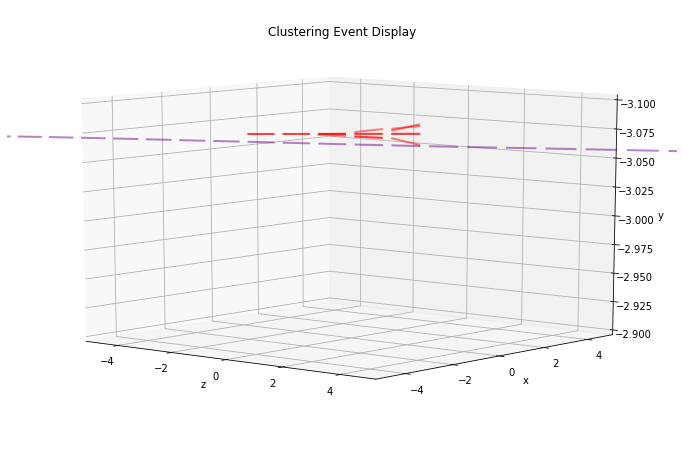

In [163]:
plot_cluster(dfcluster)